In [1]:
#carga de librerías

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,  GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


In [2]:
data= pd.read_csv('newdata.csv')
data.head()

,Unnamed: 0,psqi_1,psqi_2,psqi_3,psqi_4,psqi_5a,psqi_5b,psqi_5c,psqi_5d,psqi_5e,...,employment_covid,institution_measures,normal,normal_units,normal_days,mtq_dif_workday_sleeponset,mtq_dif_workday_sleepend,mtq_dif_freeday_sleeponset,mtq_dif_freeday_sleepend,mtq_dif_chronotype
0,0,1380,10.0,390,6.0,1.0,3.0,3.0,0.0,0.0,...,0.0,1.0,3.0,3.0,91.5,6.476972,6.476972,6.475433,6.475433,6.475433
1,1,1320,5.0,360,7.0,1.0,3.0,2.0,0.0,0.0,...,0.0,1.0,3.0,3.0,91.5,3.433987,3.828641,4.110874,3.433987,4.219508
2,2,0,10.0,580,9.0,1.0,1.0,3.0,0.0,0.0,...,0.0,1.0,3.0,3.0,91.5,3.433987,4.615121,5.017280,0.000000,4.454347
3,3,150,10.0,660,10.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,3.0,91.5,4.795791,4.110874,4.795791,4.110874,4.510860
4,4,1290,10.0,450,7.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,3.0,3.0,91.5,6.621406,3.433987,3.433987,3.433987,4.110874


In [3]:
data['bio_sex'].value_counts()

1.0    695
2.0    144
Name: bio_sex, dtype: int64

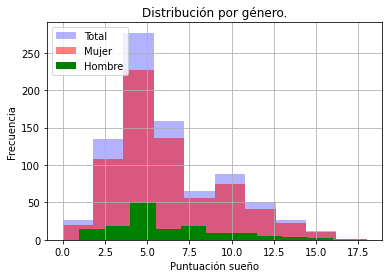

In [4]:
data['PSQI_TOTAL'].hist(label='Total',color="blue", alpha=0.3)
data[data['bio_sex'] == 1]['PSQI_TOTAL'].hist(color="red", 
                                           label='Mujer', alpha=0.5)
data[data['bio_sex'] == 2]['PSQI_TOTAL'].hist(color="green", 
                                           label='Hombre', alpha=1)

plt.title('Distribución por género.')
plt.xlabel('Puntuación sueño')
plt.ylabel('Frecuencia')
plt.legend(loc='upper left');

([<matplotlib.axis.XTick at 0x220b336d6a0>,
 [Text(0, 0, 'Soltero'),
  Text(1, 0, 'En pareja'),
  Text(2, 0, 'Casado'),
  Text(3, 0, 'Divorciado'),
  Text(4, 0, 'Viudo')])

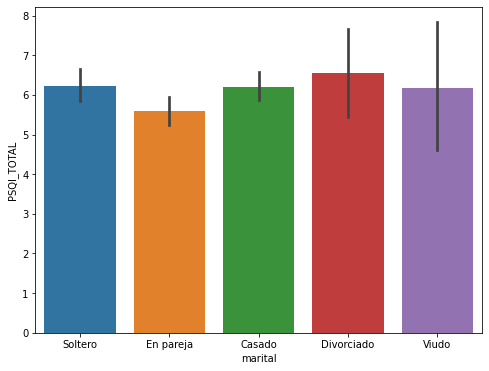

In [5]:

plt.figure(figsize = (8,6))
grupos = ['Soltero','En pareja','Casado','Divorciado','Viudo']
sns.barplot(x='marital', y = 'PSQI_TOTAL', data = data)
plt.xticks([0,1,2,3,4],grupos)

([<matplotlib.axis.XTick at 0x220b33eca00>,
 [Text(0, 0, '0-25'),
  Text(1, 0, '25-50'),
  Text(2, 0, '50-75'),
  Text(3, 0, '75-100'),
  Text(4, 0, '100-150'),
  Text(5, 0, '150-250'),
  Text(6, 0, '>250')])

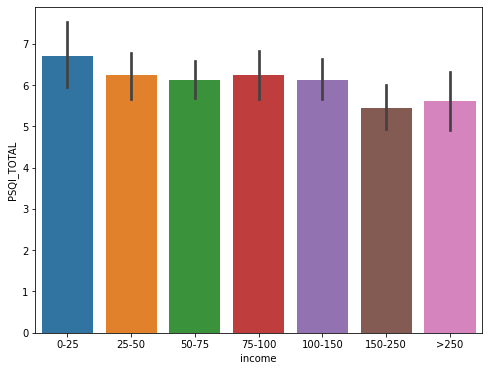

In [6]:
plt.figure(figsize = (8,6))
grupos = ['0-25','25-50','50-75','75-100','100-150','150-250','>250']
sns.barplot(x='income', y = 'PSQI_TOTAL', data = data)
plt.xticks([0,1,2,3,4,5,6],grupos)

In [7]:
out = [0 for i in range(19)] 
print(data.marital.value_counts())
for i in range(19):
    out[i]=  data[data['PSQI_TOTAL']==i] 
   # print(i)
  #  print(out[i].marital.value_counts())
mar = [0 for i in range(6)] 
for i in range(6):
    mar[i]=  data[data['marital']==i] 
    

3.0    313
1.0    259
2.0    211
4.0     38
5.0     18
Name: marital, dtype: int64


C:\Users\anagb\anaconda3\lib\site-packages\seaborn\axisgrid.py:1595: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\anagb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anagb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anagb\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vert

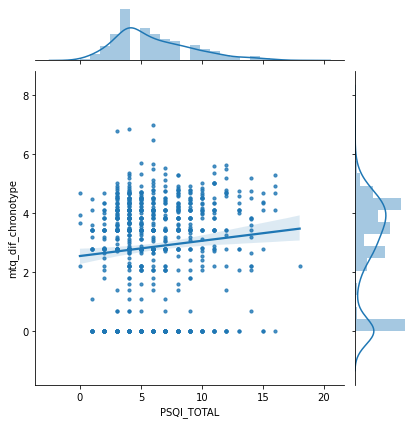

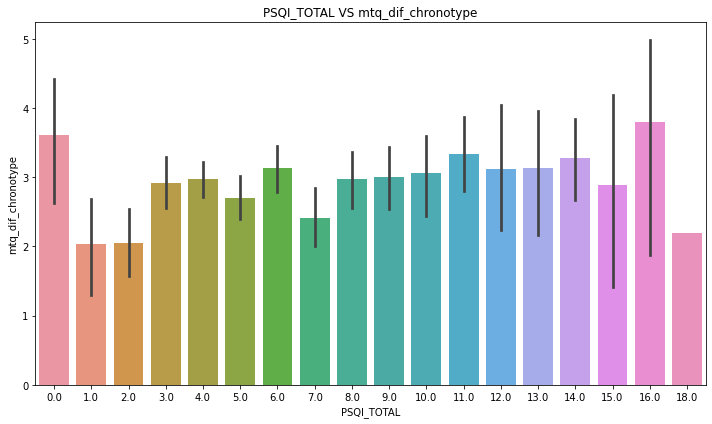

<Figure size 432x288 with 0 Axes>

In [8]:
featureA = 'PSQI_TOTAL'
featureB = 'mtq_dif_chronotype'
featureA_featureB = data[[featureA, featureB]]

g = sns.JointGrid(x=featureA, y=featureB, data=featureA_featureB, size=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x=featureA, y=featureB, data=featureA_featureB, ax=axs)
plt.title('PSQI_TOTAL VS mtq_dif_chronotype')

plt.tight_layout()
plt.show()
plt.gcf().clear()

C:\Users\anagb\anaconda3\lib\site-packages\seaborn\axisgrid.py:1595: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\anagb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anagb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anagb\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vert

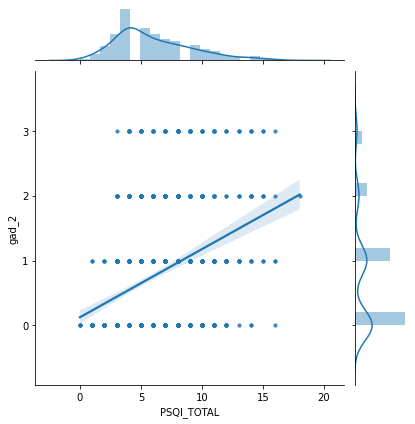

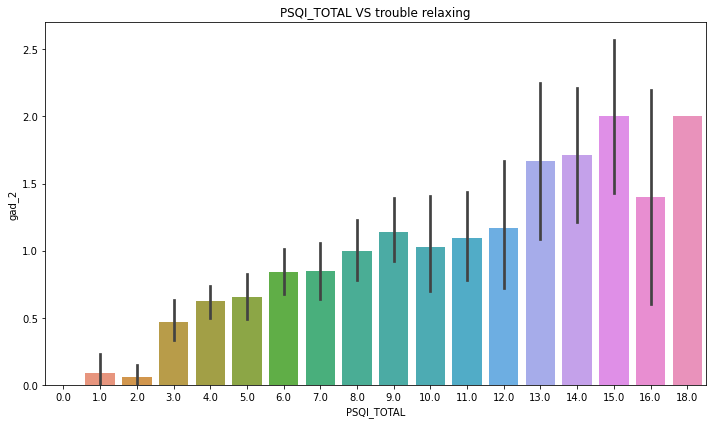

<Figure size 432x288 with 0 Axes>

In [9]:
featureA = 'PSQI_TOTAL'
featureB = 'gad_2'
featureA_featureB = data[[featureA, featureB]]

g = sns.JointGrid(x=featureA, y=featureB, data=featureA_featureB, size=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x=featureA, y=featureB, data=featureA_featureB, ax=axs)
plt.title('PSQI_TOTAL VS trouble relaxing')

plt.tight_layout()
plt.show()
plt.gcf().clear()

C:\Users\anagb\anaconda3\lib\site-packages\seaborn\axisgrid.py:1595: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\anagb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anagb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anagb\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vert

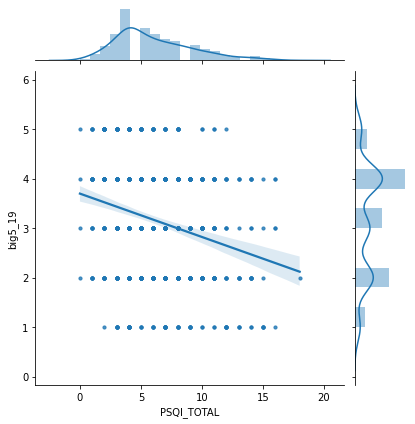

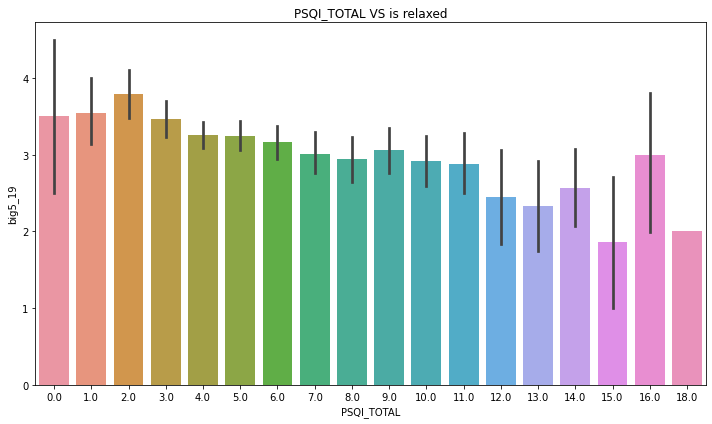

<Figure size 432x288 with 0 Axes>

In [10]:
featureA = 'PSQI_TOTAL'
featureB = 'big5_19'
featureA_featureB = data[[featureA, featureB]]

g = sns.JointGrid(x=featureA, y=featureB, data=featureA_featureB, size=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x=featureA, y=featureB, data=featureA_featureB, ax=axs)
plt.title('PSQI_TOTAL VS is relaxed')

plt.tight_layout()
plt.show()
plt.gcf().clear()

C:\Users\anagb\anaconda3\lib\site-packages\seaborn\axisgrid.py:1595: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\anagb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anagb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anagb\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vert

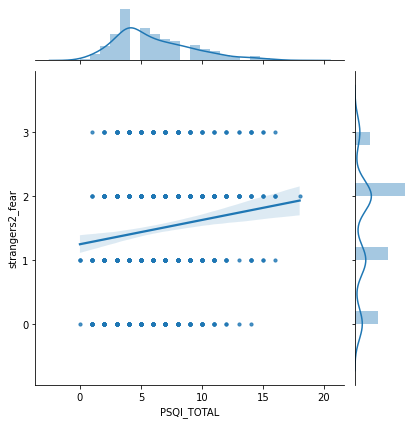

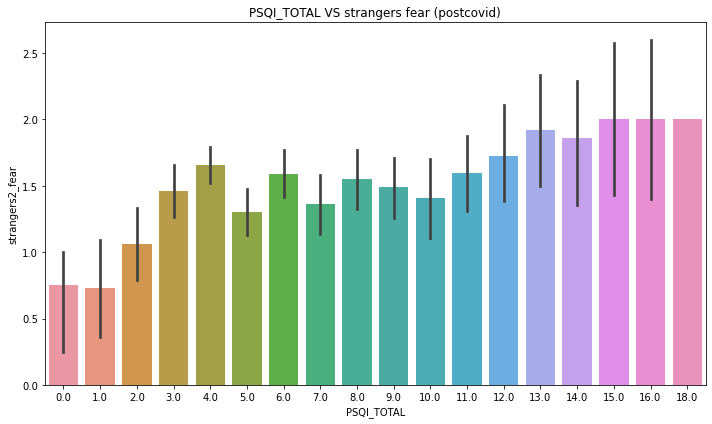

<Figure size 432x288 with 0 Axes>

In [11]:
featureA = 'PSQI_TOTAL'
featureB = 'strangers2_fear'
featureA_featureB = data[[featureA, featureB]]

g = sns.JointGrid(x=featureA, y=featureB, data=featureA_featureB, size=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x=featureA, y=featureB, data=featureA_featureB, ax=axs)
plt.title('PSQI_TOTAL VS strangers fear (postcovid)')

plt.tight_layout()
plt.show()
plt.gcf().clear()



In [12]:
df= pd.read_csv('2/2b_COVID19_Round1_cleaned_deid_2020-12-10_15_24.csv')
df.head()

,record_id,redcap_survey_identifier,round_1_timestamp,sub_id,date_time_rd1,psqi_1,psqi_2,psqi_3,psqi_4,psqi_5a,...,Big_5_Trust,Big_5_Organization,Big_5_Productiveness,Big_5_Responsibility,Big_5_Anxiety,Big_5_Depression,Big_5_Emotional_Volatility,Big_5_Aesthetic_Sensitivity,Big_5_Intellectual_Curiosity,Big_5_Creative_Imagination
0,354,NaN,2020-05-20 17:21:21,1,2020-05-20 13:08:00,23:00,10.0,06:30,6.0,1.0,...,4.0,8.0,6.0,6.0,4.0,3.0,6.0,6.0,6.0,6.0
1,744,NaN,2020-05-27 10:41:30,2,2020-05-27 05:14:00,22:00,5.0,06:00,7.0,1.0,...,9.0,9.0,7.0,9.0,7.0,5.0,4.0,9.0,9.0,9.0
2,783,NaN,2020-05-28 16:20:38,4,2020-05-28 12:07:00,00:00,10.0,09:40,9.0,1.0,...,9.0,10.0,8.0,9.0,8.0,3.0,7.0,3.0,4.0,3.0
3,467,NaN,2020-05-23 15:16:00,11,2020-05-23 11:04:00,02:30,10.0,11:00,10.0,1.0,...,8.0,4.0,5.0,8.0,8.0,6.0,7.0,2.0,7.0,5.0
4,685,NaN,2020-05-25 16:05:12,12,2020-05-25 11:46:00,21:30,10.0,07:30,7.0,1.0,...,8.0,6.0,6.0,8.0,7.0,6.0,3.0,8.0,9.0,9.0
